In [1]:
import os

import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
import urllib.request
import seaborn as sns
import plotly.express as px
import folium
from random import sample
import geopandas as gpd

from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

/Users/chloeroudaut/anaconda3/envs/myenv/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('scaled_features.csv')

In [3]:
data.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'avg_order_value',
       'std_order_value', 'unique_products_count', 'avg_delivery_time',
       'avg_review_score', 'installment_payment_count'],
      dtype='object')

In [4]:
# 2. Préparation des données
# Sélection des features pour le clustering (excluons customer_id)
features = ['recency', 'frequency', 'monetary', 'avg_order_value', 'std_order_value', 
            'unique_products_count', 'avg_delivery_time', 'avg_review_score', 'installment_payment_count']

X = data[features]

# 3. Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMEANS

In [5]:
# 4. K-means clustering
# Nous allons essayer avec 3 à 6 clusters
n_clusters_range = range(3, 7)
inertias = []
silhouette_scores = []



In [6]:
sample_size = 10000  # Ajustez selon vos besoins
X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False)]

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_sample)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_sample, kmeans.labels_))


Cluster 0:
recency                     -0.012258
frequency                   -0.039414
monetary                    -0.011605
avg_order_value              0.056440
std_order_value             -0.012546
unique_products_count       -0.165962
avg_delivery_time            0.891222
avg_review_score            -1.867674
installment_payment_count    0.010052
dtype: float64

Cluster 1:
recency                      0.992312
frequency                   -0.116962
monetary                    -0.071947
avg_order_value             -0.049813
std_order_value             -0.016070
unique_products_count       -0.167434
avg_delivery_time           -0.064589
avg_review_score             0.372376
installment_payment_count   -0.016373
dtype: float64

Cluster 2:
recency                      0.004484
frequency                    2.518793
monetary                     1.518417
avg_order_value              1.073432
std_order_value              0.399237
unique_products_count        3.597001
avg_delivery_time     

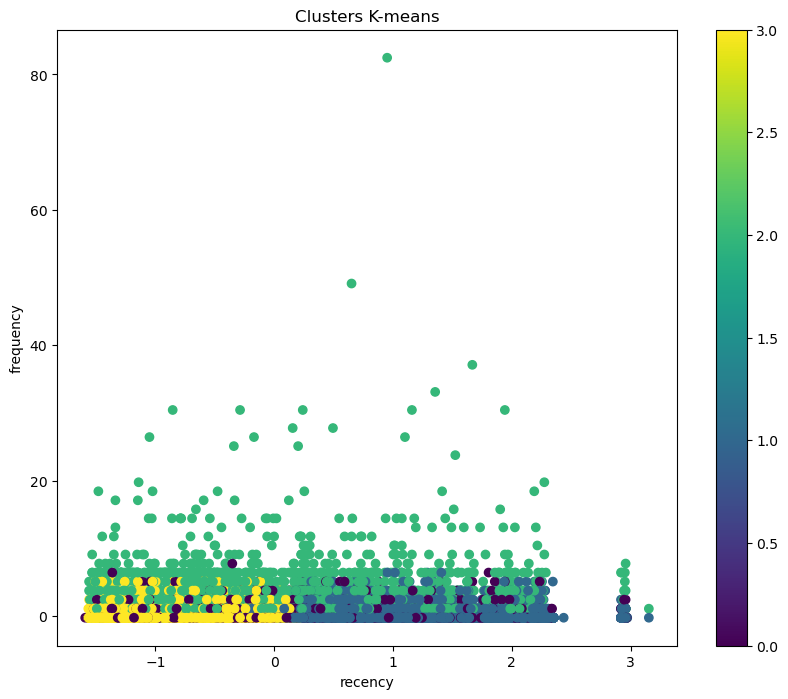

In [7]:

# 6. Choix du nombre optimal de clusters
# Basé sur les graphiques, choisissez le nombre optimal de clusters
optimal_clusters = 4  # À ajuster en fonction des résultats

# 7. Application du K-means final
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# 8. Ajout des labels de cluster au DataFrame original
data['Cluster'] = cluster_labels

# 9. Analyse des clusters
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[features].mean())

# 10. Visualisation 2D (utilisant les deux premières features comme exemple)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Clusters K-means')
plt.colorbar(scatter)
plt.show()

Cluster 0 : "Clients satisfaits mais lents"

Caractéristiques principales : Temps de livraison très long (0.891222), satisfaction client très basse (-1.867674)
Comportement : Proche de la moyenne sur la plupart des autres métriques
Interprétation : Ces clients semblent tolérer des temps de livraison longs, mais cela affecte négativement leur satisfaction. Ils restent des clients moyens en termes de fréquence et de valeur monétaire.


Cluster 1 : "Clients récents et satisfaits"

Caractéristiques principales : Récence très élevée (0.992312), satisfaction client au-dessus de la moyenne (0.372376)
Comportement : Légèrement en dessous de la moyenne pour la fréquence et la valeur monétaire
Interprétation : Ce groupe semble représenter des clients récents, potentiellement des nouveaux clients, qui sont satisfaits de leur expérience mais n'ont pas encore établi un historique d'achat important.


Cluster 2 : "Clients VIP à haute valeur"

Caractéristiques principales : Fréquence très élevée (2.518793), valeur monétaire élevée (1.518417), grande variété de produits achetés (3.597001)
Comportement : Au-dessus de la moyenne sur presque toutes les métriques, sauf la satisfaction client (-0.484530)
Interprétation : Ce sont vos clients les plus précieux, qui achètent fréquemment, dépensent beaucoup et achètent une grande variété de produits. Cependant, leur satisfaction est légèrement inférieure à la moyenne, ce qui pourrait être un point d'attention.


Cluster 3 : "Clients anciens et satisfaits"

Caractéristiques principales : Récence très basse (-0.755499), satisfaction client au-dessus de la moyenne (0.409067)
Comportement : Légèrement en dessous de la moyenne pour la plupart des autres métriques
Interprétation : Ces clients n'ont pas acheté récemment, mais restent satisfaits. Ils pourraient être des clients fidèles qui n'ont pas eu besoin de faire un achat récemment, ou des clients à risque de churn malgré leur satisfaction.
Recommandations :


Pour le Cluster 0 : Améliorez les temps de livraison pour augmenter la satisfaction client.

Pour le Cluster 1 : Concentrez-vous sur la rétention et l'augmentation de la valeur de ces nouveaux clients satisfaits.

Pour le Cluster 2 : Investiguer pourquoi ces clients VIP ont une satisfaction inférieure à la moyenne et mettez en place des actions pour l'améliorer.

Pour le Cluster 3 : Lancez une campagne de réactivation pour encourager ces clients satisfaits à faire de nouveaux achats.

Cette segmentation vous permet de cibler vos efforts marketing et d'amélioration de service en fonction des caractéristiques spécifiques de chaque groupe de clients.


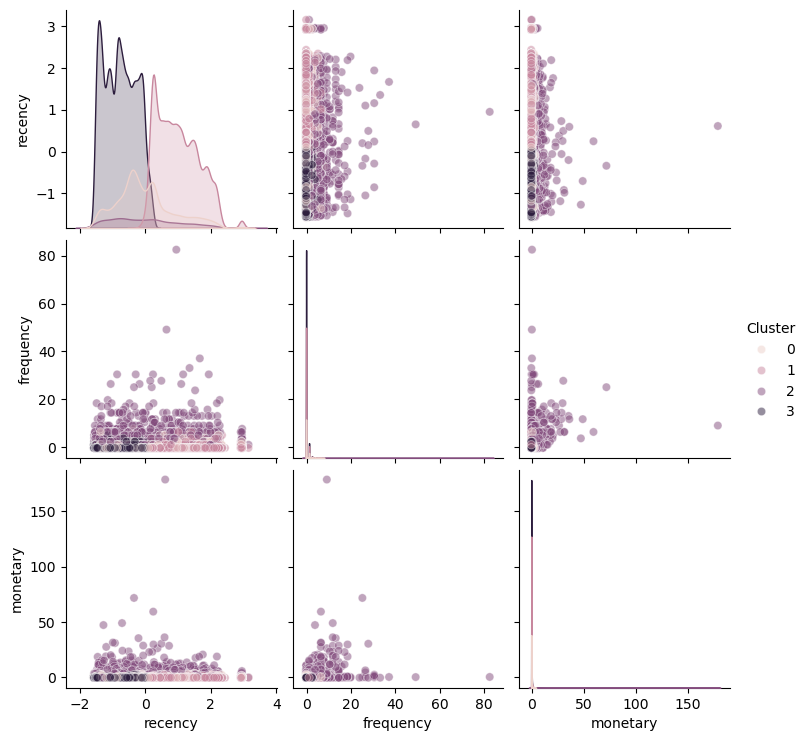

In [8]:
import seaborn as sns

features_to_plot = ['recency', 'frequency', 'monetary']
sns.pairplot(data[features_to_plot + ['Cluster']], hue='Cluster', plot_kws={'alpha': 0.5})
plt.show()

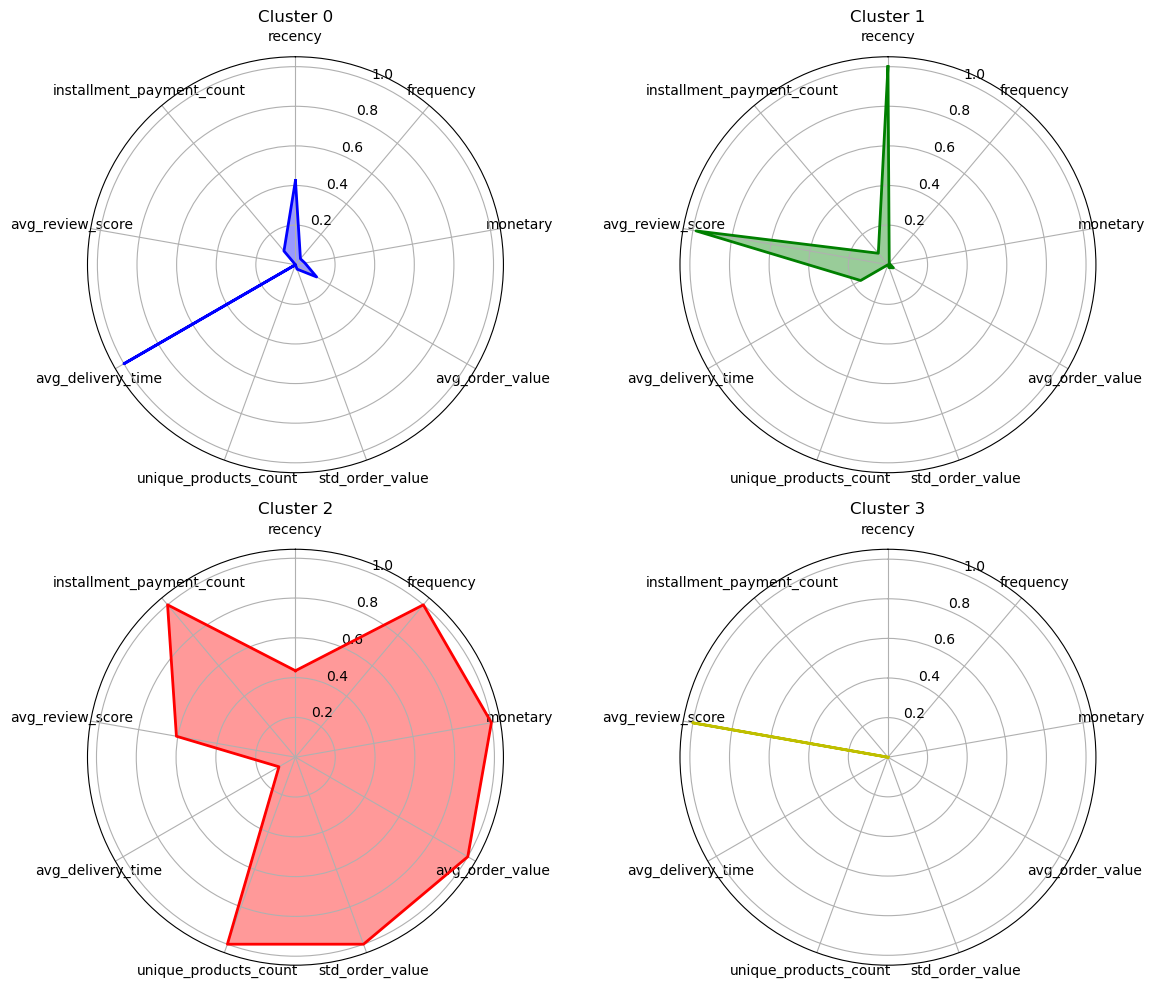

In [9]:
from math import pi

def make_spider(df, row, title, color):
    categories = list(df.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(2, 2, row+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_title(title)
    
    values = df.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

# Préparer les données
cluster_means = data.groupby('Cluster')[features].mean()
cluster_means_scaled = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Créer le plot
plt.figure(figsize=(12, 10))
colors = ['b', 'g', 'r', 'y']
for i in range(4):
    make_spider(cluster_means_scaled, i, f'Cluster {i}', colors[i])
plt.tight_layout()
plt.show()

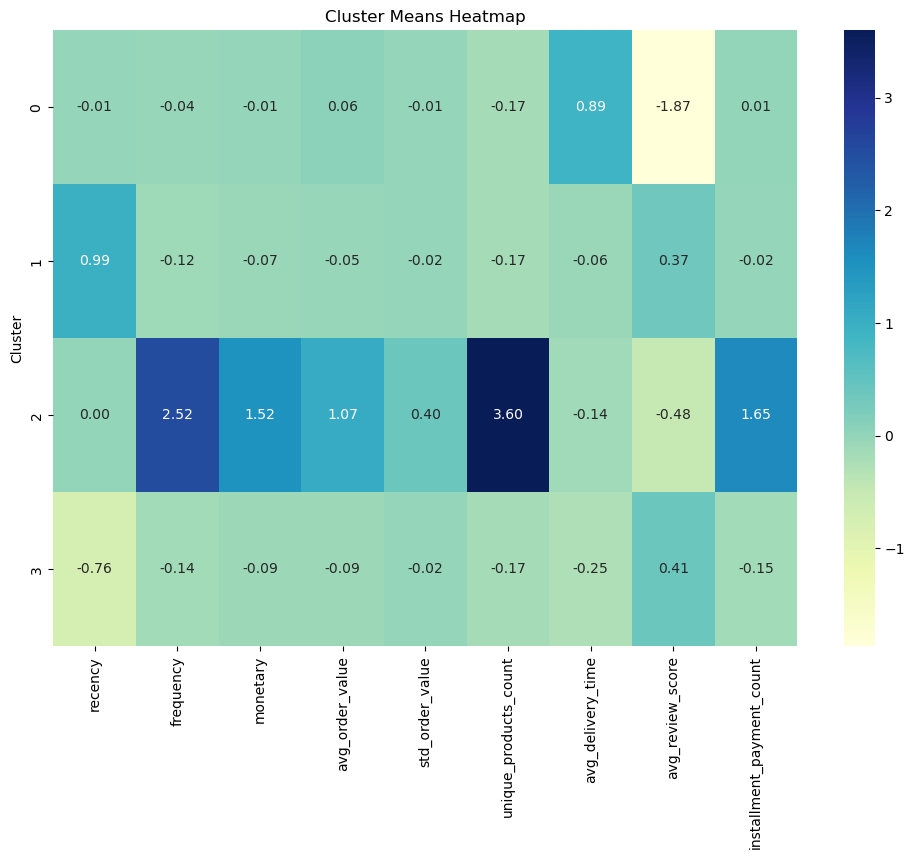

In [10]:
cluster_means = data.groupby('Cluster')[features].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Means Heatmap')
plt.show()

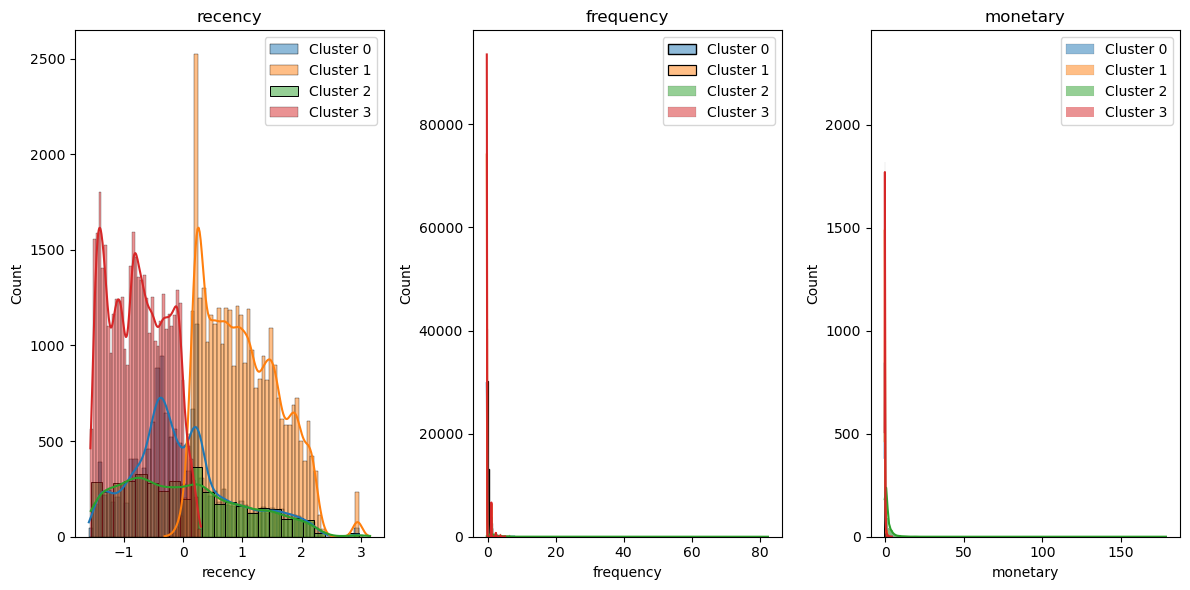

In [11]:
plt.figure(figsize=(12, 6))
for feature in ['recency', 'frequency', 'monetary']:
    plt.subplot(1, 3, features.index(feature) + 1)
    for cluster in range(4):
        sns.histplot(data[data['Cluster'] == cluster][feature], 
                     label=f'Cluster {cluster}', kde=True, alpha=0.5)
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()

### DBSCAN

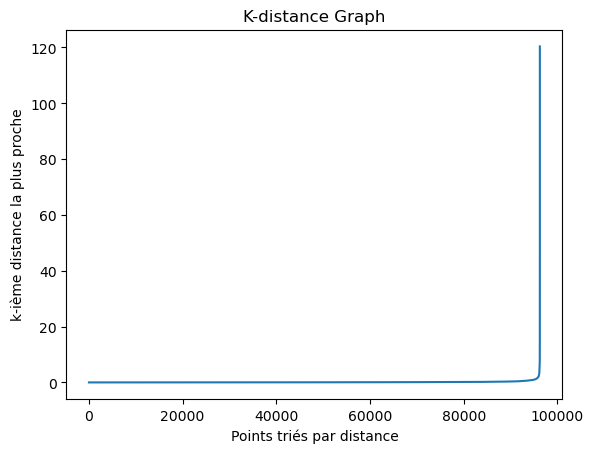

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5  # Vous pouvez ajuster cette valeur
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Trier les distances au k-ième voisin le plus proche
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points triés par distance')
plt.ylabel('k-ième distance la plus proche')
plt.show()

Nombre de clusters: 60
Nombre de points de bruit: 1229

Cluster 0:
recency                      0.027480
frequency                   -0.264131
monetary                    -0.035473
avg_order_value              0.124248
std_order_value             -0.073734
unique_products_count       -0.167434
avg_delivery_time            0.027347
avg_review_score             0.026201
installment_payment_count    0.556874
dtype: float64

Cluster 1:
recency                     -0.046198
frequency                   -0.264131
monetary                    -0.161030
avg_order_value             -0.229705
std_order_value             -0.073734
unique_products_count       -0.167434
avg_delivery_time           -0.038950
avg_review_score             0.063445
installment_payment_count   -0.838690
dtype: float64

Cluster 2:
recency                      0.046360
frequency                    3.739346
monetary                     0.451278
avg_order_value             -0.172800
std_order_value              0.438481
uniqu

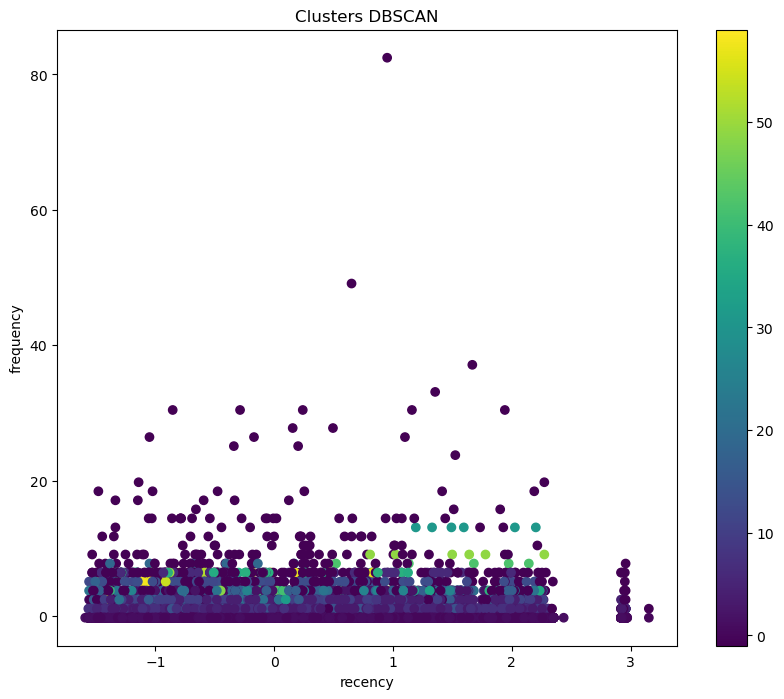

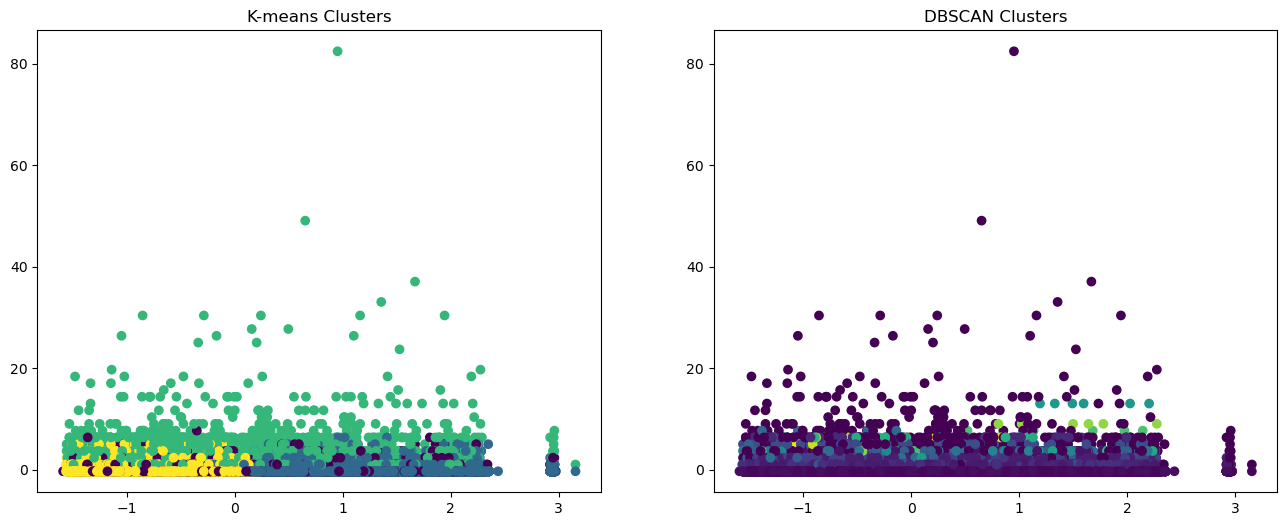

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Application de DBSCAN
eps = 0.75  # À ajuster en fonction du graphique
min_samples = 5  # À ajuster selon vos besoins

dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Ajout des labels au DataFrame
data['DBSCAN_Cluster'] = dbscan_labels

# 4. Analyse des clusters
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Nombre de clusters: {n_clusters}")
print(f"Nombre de points de bruit: {n_noise}")

for cluster in set(dbscan_labels):
    if cluster != -1:
        cluster_data = data[data['DBSCAN_Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(cluster_data[features].mean())

# 5. Visualisation 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Clusters DBSCAN')
plt.colorbar(scatter)
plt.show()

# 6. Comparaison avec K-means
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clusters')
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.show()


In [14]:
from collections import Counter
cluster_sizes = Counter(dbscan_labels)
print(cluster_sizes.most_common())


[(0, 42967), (1, 40546), (3, 3597), (7, 2881), (5, 1470), (-1, 1229), (14, 813), (4, 568), (9, 492), (10, 406), (2, 237), (17, 184), (11, 134), (16, 112), (13, 70), (8, 62), (6, 61), (12, 51), (21, 34), (26, 30), (22, 27), (37, 24), (15, 21), (32, 20), (20, 12), (35, 11), (45, 11), (28, 10), (33, 10), (39, 9), (29, 8), (19, 7), (25, 7), (24, 6), (31, 6), (49, 6), (34, 6), (36, 6), (23, 5), (46, 5), (42, 5), (41, 5), (43, 5), (44, 5), (47, 5), (55, 5), (18, 4), (59, 4), (27, 4), (30, 4), (53, 4), (54, 4), (52, 4), (40, 4), (57, 4), (50, 4), (51, 4), (56, 4), (38, 3), (58, 3), (48, 3)]


In [15]:
for cluster in set(dbscan_labels):
    if cluster != -1:  # Ignore les points de bruit
        cluster_points = X_scaled[dbscan_labels == cluster]
        if len(cluster_points) > 100:  # Ajustez ce seuil selon vos besoins
            print(f"Cluster {cluster} - Taille: {len(cluster_points)}")
            print(pd.DataFrame(cluster_points, columns=features).mean())
            print("\n")

Cluster 0 - Taille: 42967
recency                      0.027480
frequency                   -0.264131
monetary                    -0.035473
avg_order_value              0.124248
std_order_value             -0.073734
unique_products_count       -0.167434
avg_delivery_time            0.027347
avg_review_score             0.026201
installment_payment_count    0.556874
dtype: float64


Cluster 1 - Taille: 40546
recency                     -0.046198
frequency                   -0.264131
monetary                    -0.161030
avg_order_value             -0.229705
std_order_value             -0.073734
unique_products_count       -0.167434
avg_delivery_time           -0.038950
avg_review_score             0.063445
installment_payment_count   -0.838690
dtype: float64


Cluster 2 - Taille: 237
recency                      0.046360
frequency                    3.739346
monetary                     0.451278
avg_order_value             -0.172800
std_order_value              0.438481
unique_products_

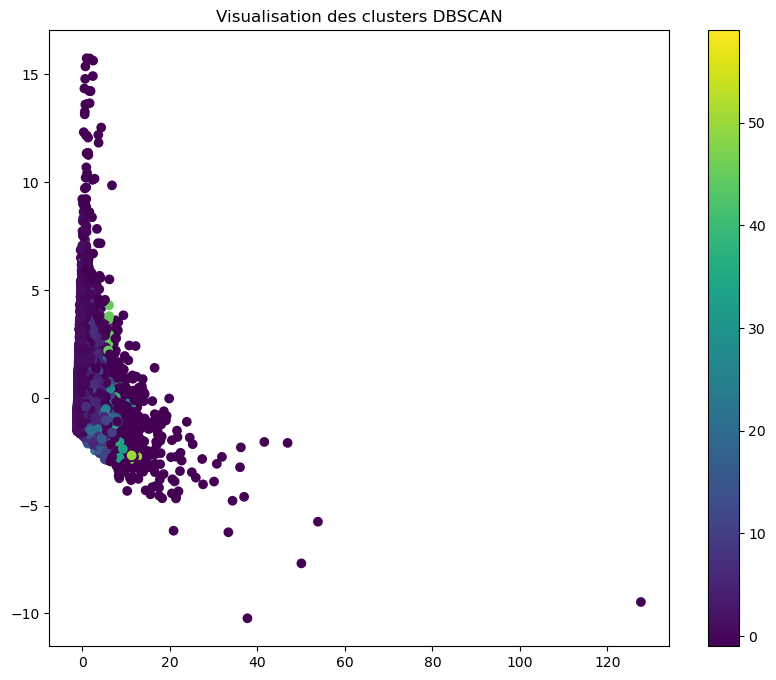

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualisation des clusters DBSCAN')
plt.show()

### ACH

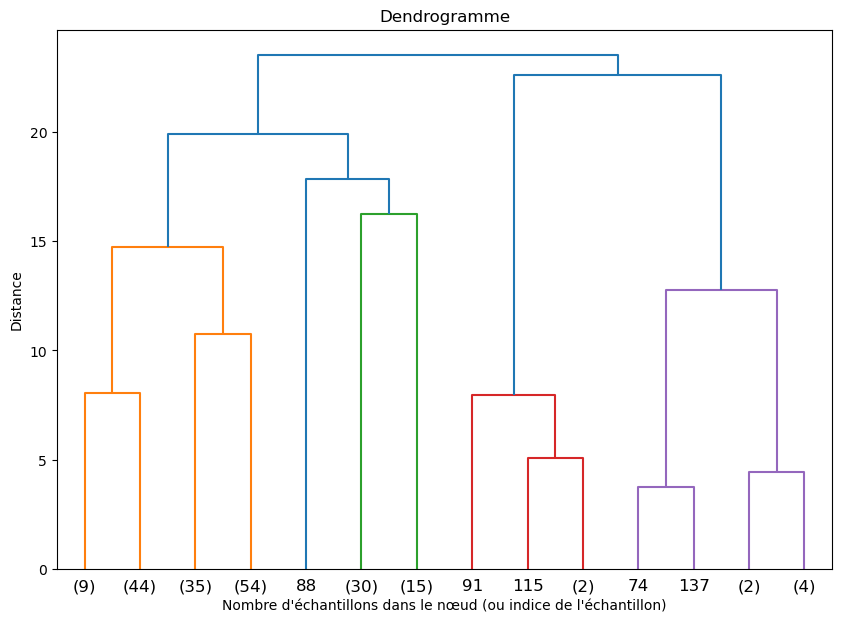

Nombre de clusters : 200
Labels des clusters : [130 173 110 134 167 133 153 179 183 182 187 102 159 138 112 139 181 142
 188 197 184 116 157 122 174  93 147 169 163 132 151 141 127 115 113 131
 150 143  86 175  70 111 129 100 158  78 170 198 193 189 109 164 144 152
 149 185 140 114 161 124 171 145 125 137 172 123 162 166 121 165 199 180
 104 190  61  69 168 186 178 128 195 101  82  81  83 146  92 135 160 126
 194 103 105  62 119 177  89 154  57  90 148  80 155  66  71  63  79 192
  75  96  76  54 136  73  84  37 176  74  72  60 196  34  41  39  85  40
 108 117  36 191 118  91  95  88 156  68  58  67  97  45  77  94  47  33
  50 107  16  65 106 120  87  99  44  32  98  59  28  56  43  48  49  64
  53  46  38  19  31  26  29  42  35  52  20  55  21  27   9  23  18  22
  17  24  51  11  15  25  13  10  12   7   8   5   3   4  30  14   6   2
   1   0]


In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


# Sélectionner un échantillon aléatoire de 200 données
data_sample = data.sample(n=200, random_state=42)

# Sélectionner les colonnes pour le clustering (ajustez selon vos besoins)
features = ['recency', 'frequency', 'monetary', 'avg_order_value', 'std_order_value', 
            'unique_products_count', 'avg_delivery_time', 'avg_review_score', 'installment_payment_count']
X = data_sample[features]

# Normaliser les données
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Effectuer le clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

# Ajuster le modèle et obtenir les labels
clustering.fit(X_normalized)

# Fonction pour tracer le dendrogramme
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.title('Dendrogramme')
plt.xlabel('Nombre d\'échantillons dans le nœud (ou indice de l\'échantillon)')
plt.ylabel('Distance')
plt.show()

# Afficher les résultats
print(f"Nombre de clusters : {len(set(clustering.labels_))}")
print("Labels des clusters :", clustering.labels_)